<a href="https://colab.research.google.com/github/ltomisla/Pandas/blob/main/HousePricingbetterversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [204]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [205]:
print(df1.columns[df1.isnull().any()])


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [206]:
df1.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [207]:
df1.drop('Id',axis=1,inplace=True)
df2.drop('Id',axis=1,inplace=True)

In [157]:
df1.MSZoning.value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [208]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df1[['MSZoning']]=ordinal_encoder.fit_transform(df1[['MSZoning']])
df2[['MSZoning']]=ordinal_encoder.fit_transform(df2[['MSZoning']])

In [159]:
df1.Alley.isna().sum()

1369

In [160]:
df1.LotFrontage.median()

69.0

(array([ 48.,  50., 107.,  99., 297., 247., 172.,  78.,  48.,  18.,  14.,
          8.,   4.,   4.,   1.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.        ,  30.73333333,  40.46666667,  50.2       ,
         59.93333333,  69.66666667,  79.4       ,  89.13333333,
         98.86666667, 108.6       , 118.33333333, 128.06666667,
        137.8       , 147.53333333, 157.26666667, 167.        ,
        176.73333333, 186.46666667, 196.2       , 205.93333333,
        215.66666667, 225.4       , 235.13333333, 244.86666667,
        254.6       , 264.33333333, 274.06666667, 283.8       ,
        293.53333333, 303.26666667, 313.        ]),
 <BarContainer object of 30 artists>)

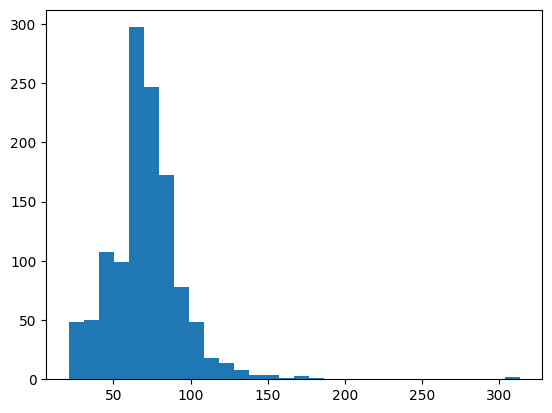

In [161]:
plt.hist(df1.LotFrontage,bins=30)

In [162]:
df1.LandContour.value_counts()

,count
LandContour,
Lvl,1311
Bnk,63
HLS,50
Low,36


In [209]:
df1.Street.value_counts()
df1[['Street']]=ordinal_encoder.fit_transform(df1[['Street']])
df2[['Street']]=ordinal_encoder.fit_transform(df2[['Street']])

In [210]:
df1.LotFrontage.fillna(df1.LotFrontage.median(),inplace=True)
df2.LotFrontage.fillna(df2.LotFrontage.median(),inplace=True)

In [211]:
df1.drop('Alley',axis=1,inplace=True)
df2.drop('Alley',axis=1,inplace=True)

In [212]:
df1.LotShape.value_counts()
df1[['LotShape']]=ordinal_encoder.fit_transform(df1[['LotShape']])
df2[['LotShape']]=ordinal_encoder.fit_transform(df2[['LotShape']])

In [213]:
df1.LandContour.value_counts()
df1['LandContour']=df1['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0 )
df2['LandContour']=df2['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0 )

In [214]:
df1=df1.drop('SalePrice',axis=1)

In [215]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df1 = pd.DataFrame(encoder.fit_transform(df1),columns=df1.columns)
df2= pd.DataFrame(encoder.fit_transform(df2),columns=df2.columns)

In [75]:
df1.MasVnrArea.value_counts()


,count
MasVnrArea,
0.0,861
180.0,8
72.0,8
108.0,8
120.0,7
...,...
562.0,1
89.0,1
921.0,1


In [76]:
df1.MasVnrType.value_counts()


,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [216]:
df1.MasVnrType.fillna(1.0,inplace=True)
df2.MasVnrType.fillna(1.0,inplace=True)

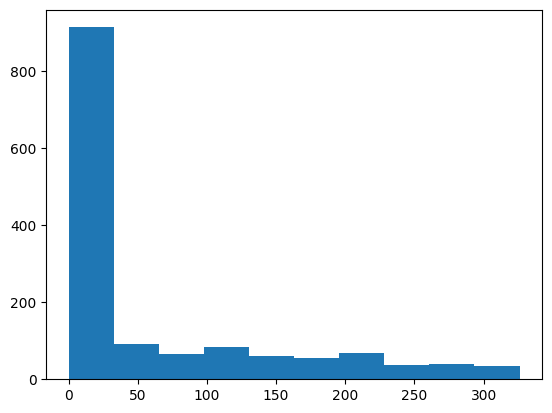

In [217]:
df1.MasVnrArea.value_counts()
plt.hist(df1.MasVnrArea)
df1.MasVnrArea.fillna(0.0,inplace=True)
df2.MasVnrArea.fillna(0.0,inplace=True)

In [218]:
df1['MasVnrArea']=df1['MasVnrArea'].apply(lambda x: 0 if x==0.0 else 1 )
df2['MasVnrArea']=df2['MasVnrArea'].apply(lambda x: 0 if x==0.0 else 1 )


In [173]:
df1.BsmtQual.value_counts()


,count
BsmtQual,
3.0,649
2.0,618
0.0,121
1.0,35


In [219]:
df1.BsmtQual.value_counts()
import random
df1.BsmtQual.fillna(random.randint(2,3),inplace=True)
df2.BsmtQual.fillna(random.randint(2,3),inplace=True)


In [83]:
df1.BsmtCond.value_counts()


,count
BsmtCond,
TA,1311
Gd,65
Fa,45
Po,2


In [220]:
df1.BsmtCond.value_counts()
df1.BsmtCond.fillna(3,inplace=True)
df2.BsmtCond.fillna(3,inplace=True)


In [85]:
df1.BsmtExposure.value_counts()


,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


In [221]:
df1.BsmtExposure.value_counts()
df1.BsmtExposure.fillna(3,inplace=True)
df2.BsmtExposure.fillna(3,inplace=True)


In [87]:
df1.BsmtFinType1.value_counts()


,count
BsmtFinType1,
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74


In [222]:
df1.BsmtFinType1.value_counts()
df1.BsmtFinType1.fillna(random.randint(0,5),inplace=True)
df2.BsmtFinType1.fillna(random.randint(0,5),inplace=True)

In [89]:
df1.BsmtFinType2.value_counts()


,count
BsmtFinType2,
Unf,1256
Rec,54
LwQ,46
BLQ,33
ALQ,19
GLQ,14


In [223]:
df1.BsmtFinType2.value_counts()
df1.BsmtFinType2.fillna(5,inplace=True)
df2.BsmtFinType2.fillna(5,inplace=True)
df1['BsmtFinType2']=df1['BsmtFinType2'].apply(lambda x: 1 if x==5.0 else 0)
df2['BsmtFinType2']=df2['BsmtFinType2'].apply(lambda x: 1 if x==5.0 else 0)

In [91]:
df1.Electrical.value_counts()


,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [224]:
df1.Electrical.value_counts()
df1.Electrical.fillna(4,inplace=True)
df2.Electrical.fillna(4,inplace=True)
df1['Electrical']=df1['Electrical'].apply(lambda x: 1 if x==4.0 else 0)
df2['Electrical']=df2['Electrical'].apply(lambda x: 1 if x==4.0 else 0)

In [93]:
df1.FireplaceQu.value_counts()


,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [225]:
df1.FireplaceQu.value_counts()
fill_values = [1, 2, 4]
df1.FireplaceQu= df1.FireplaceQu.apply(lambda x: np.random.choice(fill_values) if pd.isna(x) else x)
df2.FireplaceQu=df2.FireplaceQu.apply(lambda x: np.random.choice(fill_values) if pd.isna(x) else x)


In [95]:
df1.GarageType.value_counts()


,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


In [226]:
df1.GarageType.value_counts()
df1.GarageType.fillna(1,inplace=True)
df2.GarageType.fillna(1,inplace=True)
df1['GarageType']=df1['GarageType'].apply(lambda x: 2 if x==1.0 else(1 if x==5.0 else 2))
df2['GarageType']=df2['GarageType'].apply(lambda x: 2 if x==1.0 else(1 if x==5.0 else 2))

In [97]:
df1.GarageYrBlt.value_counts()


,count
GarageYrBlt,
2005.0,65
2006.0,59
2004.0,53
2003.0,50
2007.0,49
...,...
1927.0,1
1900.0,1
1906.0,1


In [227]:
df1.GarageYrBlt.value_counts()
df1.GarageYrBlt.fillna(random.randint(0.0,96.0),inplace=True)
df1.GarageYrBlt.fillna(random.randint(0.0,96.0),inplace=True)
df1.drop('GarageYrBlt',axis=1,inplace=True)
df2.drop('GarageYrBlt',axis=1,inplace=True)

In [183]:
df1.GarageFinish.value_counts()


,count
GarageFinish,
2.0,605
1.0,422
0.0,352


In [228]:
df1.GarageFinish.value_counts()
df1.GarageFinish.fillna(random.randint(0.0,2.0),inplace=True)
df2.GarageFinish.fillna(random.randint(0.0,2.0),inplace=True)

In [101]:
df1.GarageQual.value_counts()


,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


In [229]:
df1.GarageQual.value_counts()
df1.GarageQual.fillna(4,inplace=True)
df2.GarageQual.fillna(4,inplace=True)
df1['GarageQual']=df1['GarageQual'].apply(lambda x: 1 if x==4.0 else 0)
df2['GarageQual']=df2['GarageQual'].apply(lambda x: 1 if x==4.0 else 0)

In [230]:
df1.GarageCond.value_counts()
df1['GarageCond']=df1['GarageCond'].apply(lambda x: 1 if x==4.0 else 0)
df2['GarageCond']=df2['GarageCond'].apply(lambda x: 1 if x==4.0 else 0)

In [231]:
df1.GarageCond.value_counts()
df1.GarageCond.fillna(4,inplace=True)
df2.GarageCond.fillna(4,inplace=True)

In [105]:
df1.PoolQC.value_counts()

,count
PoolQC,
Gd,3
Ex,2
Fa,2


In [232]:
df1.PoolQC.value_counts()
df1.PoolQC.fillna(1,inplace=True)
df2.PoolQC.fillna(1,inplace=True)
df1['PoolQC']=df1['PoolQC'].apply(lambda x: 1 if x==1.0 else 0)
df2['PoolQC']=df2['PoolQC'].apply(lambda x: 1 if x==1.0 else 0)

In [107]:
df1.Fence.value_counts()


,count
Fence,
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [233]:
df1.Fence.value_counts()
df1.Fence.fillna(1,inplace=True)
df1.Fence.fillna(1,inplace=True)
df1['Fence']=df1['Fence'].apply(lambda x: 1 if x==1.0 else 0)
df2['Fence']=df2['Fence'].apply(lambda x: 1 if x==1.0 else 0)

In [110]:
df1.MiscFeature.value_counts()


,count
MiscFeature,
Shed,49
Gar2,2
Othr,2
TenC,1


In [234]:
df1.MiscFeature.value_counts()
df1.MiscFeature.fillna(1,inplace=True)
df2.MiscFeature.fillna(1,inplace=True)
df1['MiscFeature']=df1['MiscFeature'].apply(lambda x: 1 if x==1.0 else 0)
df2['MiscFeature']=df2['MiscFeature'].apply(lambda x: 1 if x==1.0 else 0)

In [113]:
df2.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [235]:
df1 = pd.get_dummies(df1)
df2 = pd.get_dummies(df2)


In [236]:
df1, df2 = df1.align(df2, join='left', axis=1)


In [249]:
ninotonkica=pd.read_csv('train.csv')
y = ninotonkica['SalePrice']
X = df1

In [250]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
X=pd.DataFrame(object.fit_transform(X))
df2=pd.DataFrame(object.transform(df2))

In [251]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [252]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)


In [253]:
gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1000,
                          random_state=42)

In [254]:
df2.fillna(df2.median(),inplace=True)
print(df2.columns[df2.isnull().any()])


Index([], dtype='int64')


In [255]:
y_pred = gbr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE on validation set: {rmse}")

RMSE on validation set: 25510.60966716126


In [256]:
test_predictions = gbr.predict(df2)
test_predictions


array([133587.48012798, 163917.72439731, 182269.62322837, ...,
       170139.25176351, 118879.9968608 , 229150.02963919])

In [245]:
nina = pd.DataFrame(test_predictions, columns=['Column1'])
nina

,Column1
0,133587.480128
1,163917.724397
2,182269.623228
3,195394.499512
4,187485.825098
...,...
1454,83675.223064
1455,86736.554408
1456,170139.251764
1457,118879.996861


In [246]:
nino1=pd.read_csv('test.csv')

ids=nino1.Id
ids

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [247]:
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': nina.Column1 })
output

,Id,SalePrice
0,1461,133587.480128
1,1462,163917.724397
2,1463,182269.623228
3,1464,195394.499512
4,1465,187485.825098
...,...,...
1454,2915,83675.223064
1455,2916,86736.554408
1456,2917,170139.251764
1457,2918,118879.996861


In [248]:
output.to_csv('submission.csv', index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
X=pd.DataFrame(object.fit_transform(X))
df2=pd.DataFrame(object.transform(df2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [257]:
X.shape

(1460, 77)

In [258]:
df2.shape

(1459, 77)

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [260]:
model4=Sequential()

In [261]:
model4.add(Dense(77,activation='relu'))
model4.add(Dense(77,activation='relu'))
model4.add(Dense(77,activation='relu'))
model4.add(Dense(77,activation='relu'))
model4.add(Dense(1))

In [262]:
model4.compile(optimizer='adam',loss='mse')

In [264]:
model4.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),verbose=1,epochs=400)

Epoch 1/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 37727715328.0000 - val_loss: 39620591616.0000
Epoch 2/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40714743808.0000 - val_loss: 38581002240.0000
Epoch 3/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35331497984.0000 - val_loss: 27994759168.0000
Epoch 4/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21844154368.0000 - val_loss: 8021746688.0000
Epoch 5/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7273295360.0000 - val_loss: 4836872704.0000
Epoch 6/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4463931392.0000 - val_loss: 2725850624.0000
Epoch 7/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2443206400.0000 - val_loss: 2039167616.0000
Epoch 8/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1838293120.0000 - val_loss: 1763430400.0000
Epoch 9/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1334359936.0000 - val_loss: 1608406016.0000
Epoch 10/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12037

In [265]:
predictions = model4.predict(df2)
predictions

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[168329.7 ],
       [202749.1 ],
       [197847.86],
       ...,
       [187628.48],
       [126692.54],
       [239298.22]], dtype=float32)

In [266]:
nina = pd.DataFrame(predictions, columns=['Column1'])
nina

,Column1
0,168329.703125
1,202749.093750
2,197847.859375
3,207680.000000
4,194541.625000
...,...
1454,130951.210938
1455,90408.156250
1456,187628.484375
1457,126692.539062


In [267]:
nino1=pd.read_csv('test.csv')

ids=nino1.Id
ids

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [268]:
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': nina.Column1 })
output

,Id,SalePrice
0,1461,168329.703125
1,1462,202749.093750
2,1463,197847.859375
3,1464,207680.000000
4,1465,194541.625000
...,...,...
1454,2915,130951.210938
1455,2916,90408.156250
1456,2917,187628.484375
1457,2918,126692.539062


In [269]:
output.to_csv('submission.csv', index=False)
